###Assigment 3
###Part I Review the online programming.

In [6]:
from collections import defaultdict

In [7]:
original_price = [1,5,8,9,10,17,17,20,24,30]
price = defaultdict(int)  ### 当调用的kyes不在dict 里面时 ，返回默认值0， 避免报错
for i, p in enumerate(original_price):  ###enumerate 可以给list 编号
    price[i+1] = p
assert price[1] == 1 ###assert function here is used to debug.

In [8]:
price[('a','b')]

0

In [9]:
price['1']

0

In [10]:
price[3]

8

In [11]:
solu = {}
## for a given length N, we set the corresponding split parts
## solution = 
##{
##        4:(2, 2)
##}

In [12]:
def func_1(n):
    for i in range(n):
        print(n)



In [13]:
import time
def call_time(func_1, arg):
    start = time.time()
    func_1(arg)
    print('used time: {}'.format(time.time()-start))

In [14]:
from functools import wraps

In [15]:
function_called_time = defaultdict(int)
def get_call_time(func):
    @wraps(func)
    def _inner(arg):
        """It's inner function"""
        global function_called_time
        function_called_time[func.__name__] += 1
        result = func(arg)
        print('function called time is : {}'.format(function_called_time[func.__name__]))#注意这里是双下划线
        return result
    return _inner

In [16]:
call_time(func_1, 10)

10
10
10
10
10
10
10
10
10
10
used time: 0.0022630691528320312


In [17]:
func_1 = get_call_time(func_1)  ## 1st method to use decorate function


In [18]:
func_1(5)

5
5
5
5
5
function called time is : 1


In [19]:
## Method 2
@get_call_time
def func_1(n):
    """
    @param n: is the number of customers     ###这一部分也很重要，以后写函数最好也写好这些说明文件，作为help 文件，方别了解函数功能
    @return int: the customers value point
    """
    
    for i in range(n):
        print(n)
    return 0

In [20]:
help(func_1)

Help on function func_1 in module __main__:

func_1(n)
    @param n: is the number of customers     ###这一部分也很重要，以后写函数最好也写好这些说明文件，作为help 文件，方别了解函数功能
    @return int: the customers value point



In [21]:
@get_call_time
def func_slow(n):
    for i in range(n):
        time.sleep(0.2)
        print(n)

In [22]:
func_slow(1)

1
function called time is : 1


In [23]:
def memo(func):   ###注意，此函数中，输入变量也是函数
    cache = {}
    @wraps(func)
    def _wrap(n):
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result
    return _wrap

In [24]:
memo(func_1)(8)

8
8
8
8
8
8
8
8
function called time is : 2


0

In [25]:

solu = {}
@memo
def r(n):
    max_price, split_point = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1,n)], key = lambda x: x[0]
    )
    solu[n] = (split_point, n-split_point)
    
    return max_price

In [26]:
r(231)

691

In [27]:
solu

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [28]:
solu[18]

(2, 16)

In [29]:
solu[4]

(2, 2)

In [30]:
solu[2]

(0, 2)

In [36]:
def not_cut(split): return split == 0

def parse_solu(target_length, revenue_solu):
    left, right = revenue_solu[target_length]
    
    if not_cut(left): return [right]
    
    return parse_solu(left, revenue_solu) + parse_solu(right, revenue_solu)

In [112]:
parse_solu(22, solu)

[2, 10, 10]

In [ ]:
###Boston House Price

In [113]:
import random
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
data = load_boston()
help(load_boston)
x,y = data['data'], data['target']
x_rm = x[:,5] #取某一个feature



Help on function load_boston in module sklearn.datasets.base:

load_boston(return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============     ==============
    Samples total                 506
    Dimensionality                 13
    Features           real, positive
    Targets             real 5. - 50.
    ==============     ==============
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        and 'DESCR', the full description of the dataset.
    
    (data, target) : tuple if ``return_X_y`` is True
    
        .. versionadded:: 0.18
    
    Examples

In [117]:
def draw_rm_and_price():
    plt.scatter(x_rm, y)

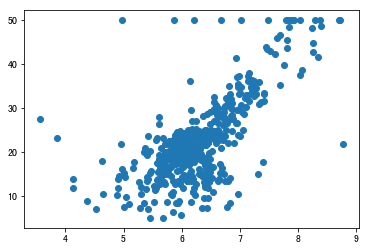

In [118]:
draw_rm_and_price()

In [119]:
def price(rm, k, b):
    ''' f(x) = k*x + b'''
    return k*rm + b

In [125]:
def draw_result(k, b):
    print('k: {}, b: {}'.format(k, b))
    price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
    draw_rm_and_price()
    plt.scatter(x_rm, price_by_random_k_and_b)

In [120]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [121]:
def partial_k(x, y, y_hat):
    return -2 / len(y) * sum([(y_i - y_hat_i) * x_i for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat))])

In [122]:
def partial_b(x, y, y_hat):
    return -2 / len(y) * sum([y_i - y_hat_i for y_i, y_hat_i in zip(list(y), list(y_hat))])

In [123]:
def gradient_descent_optimize(trying_times, loss, partial_k, partial_b, learning_rate):
    min_loss = float('inf') 
    current_k = random.random() * 200 - 100
    current_b = random.random() * 200 - 100
    print('initial k: {}, b: {}'.format(current_k, current_b))
    update_time = 0
    for i in range(trying_times):
        price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
        current_loss = loss(y, price_by_k_and_b)
        k_gradient = partial_k(x_rm, y, price_by_k_and_b)
        b_gradient = partial_b(x_rm, y, price_by_k_and_b)
        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = current_k, current_b
            if i % 50 == 0: 
                print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}, k_gradient: {}, b_gradient: {}'.format(i, best_k, best_b, min_loss, k_gradient, b_gradient))
        current_k = current_k + (-1 * k_gradient) * learning_rate
        current_b = current_b + (-1 * b_gradient) * learning_rate
    return best_k, best_b

initial k: -20.817904495259754, b: 7.803995750549106
When time is : 0, get best_k: -20.817904495259754 best_b: 7.803995750549106, and the loss is: 21672.88182008749, k_gradient: -1859.087390590341, b_gradient: -291.1234580741522
When time is : 50, get best_k: -13.16588886395412 best_b: 9.00125921171299, and the loss is: 9556.659744923338, k_gradient: -1232.0407905218785, b_gradient: -192.54869001371108
When time is : 100, get best_k: -8.094749199561793 best_b: 9.792796568606269, and the loss is: 4235.862641207421, k_gradient: -816.5088444872554, b_gradient: -127.22509786411757
When time is : 150, get best_k: -4.73390732930261 best_b: 10.315467123466979, and the loss is: 1899.2509848979348, k_gradient: -541.1436648524261, b_gradient: -83.93643197783092
When time is : 200, get best_k: -2.506447540483341 best_b: 10.659964951030691, and the loss is: 873.1332013269154, k_gradient: -358.6643540136769, b_gradient: -55.24989555218978
When time is : 250, get best_k: -1.0300586863740966 best_b: 

When time is : 2300, get best_k: 1.904248653412832 best_b: 11.115817294774494, and the loss is: 69.42976302247554, k_gradient: -0.17309977464559906, b_gradient: 1.1010350799408464
When time is : 2350, get best_k: 1.9051140913969957 best_b: 11.11031244214734, and the loss is: 69.42355255286509, k_gradient: -0.17307518594371027, b_gradient: 1.1009032973173316
When time is : 2400, get best_k: 1.9059794097841973 best_b: 11.104808248919442, and the loss is: 69.41734357652267, k_gradient: -0.17305187427880764, b_gradient: 1.1007713302459665
When time is : 2450, get best_k: 1.9068446138328372 best_b: 11.099304715835906, and the loss is: 69.41113609308948, k_gradient: -0.17302940972571393, b_gradient: 1.1006392463112096
When time is : 2500, get best_k: 1.9077097070317715 best_b: 11.09380184336367, and the loss is: 69.40493010220617, k_gradient: -0.17300750738132886, b_gradient: 1.1005070902993095
When time is : 2550, get best_k: 1.9085746916972204 best_b: 11.08829963178533, and the loss is: 69

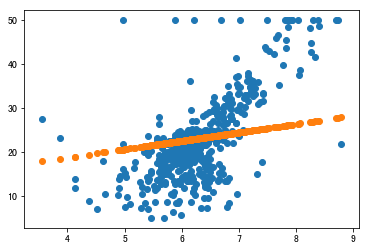

In [126]:
k, b = gradient_descent_optimize(3000, loss, partial_k, partial_b, 1e-04)
draw_result(k, b)

### PartII change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.


In [111]:
from sklearn.datasets import load_boston

In [67]:
data = load_boston()

In [85]:
X,y = data['data'], data['target']

In [86]:
X_rm = X[:,5]

In [80]:
print(X[:,5])

[ 6.575  6.421  7.185  6.998  7.147  6.43   6.012  6.172  5.631  6.004
  6.377  6.009  5.889  5.949  6.096  5.834  5.935  5.99   5.456  5.727
  5.57   5.965  6.142  5.813  5.924  5.599  5.813  6.047  6.495  6.674
  5.713  6.072  5.95   5.701  6.096  5.933  5.841  5.85   5.966  6.595
  7.024  6.77   6.169  6.211  6.069  5.682  5.786  6.03   5.399  5.602
  5.963  6.115  6.511  5.998  5.888  7.249  6.383  6.816  6.145  5.927
  5.741  5.966  6.456  6.762  7.104  6.29   5.787  5.878  5.594  5.885
  6.417  5.961  6.065  6.245  6.273  6.286  6.279  6.14   6.232  5.874
  6.727  6.619  6.302  6.167  6.389  6.63   6.015  6.121  7.007  7.079
  6.417  6.405  6.442  6.211  6.249  6.625  6.163  8.069  7.82   7.416
  6.727  6.781  6.405  6.137  6.167  5.851  5.836  6.127  6.474  6.229
  6.195  6.715  5.913  6.092  6.254  5.928  6.176  6.021  5.872  5.731
  5.87   6.004  5.961  5.856  5.879  5.986  5.613  5.693  6.431  5.637
  6.458  6.326  6.372  5.822  5.757  6.335  5.942  6.454  5.857  6.151
  6.17

In [69]:
list(y)

[24.0,
 21.600000000000001,
 34.700000000000003,
 33.399999999999999,
 36.200000000000003,
 28.699999999999999,
 22.899999999999999,
 27.100000000000001,
 16.5,
 18.899999999999999,
 15.0,
 18.899999999999999,
 21.699999999999999,
 20.399999999999999,
 18.199999999999999,
 19.899999999999999,
 23.100000000000001,
 17.5,
 20.199999999999999,
 18.199999999999999,
 13.6,
 19.600000000000001,
 15.199999999999999,
 14.5,
 15.6,
 13.9,
 16.600000000000001,
 14.800000000000001,
 18.399999999999999,
 21.0,
 12.699999999999999,
 14.5,
 13.199999999999999,
 13.1,
 13.5,
 18.899999999999999,
 20.0,
 21.0,
 24.699999999999999,
 30.800000000000001,
 34.899999999999999,
 26.600000000000001,
 25.300000000000001,
 24.699999999999999,
 21.199999999999999,
 19.300000000000001,
 20.0,
 16.600000000000001,
 14.4,
 19.399999999999999,
 19.699999999999999,
 20.5,
 25.0,
 23.399999999999999,
 18.899999999999999,
 35.399999999999999,
 24.699999999999999,
 31.600000000000001,
 23.300000000000001,
 19.600000000

In [72]:
import random

In [87]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

In [91]:
def loss(y, y_hat): # to evaluate the performance 
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

$$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$
$$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum(x_i), when 　y_i - \hat{y_i}>0; = \frac{1}{n}\sum(x_i), when 　y_i - \hat{y_i}<0$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{1}{n}\sum(1), when　y_i - \hat{y_i}>0; = \frac{1}{n}\sum(1), when　y_i - \hat{y_i}<0$$

There are two ways to write the partial for k and b. Both of them will convergent to the same precision but the Way 1 Will have slower rate of convergence, the Way 2 will have faster rate of convergence.

In [139]:
### Way 1
def partial_k(x, y, y_hat):
    n = len(y)

    grad1 = 0
    grad2 = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if (y_i-y_hat_i)>0:
            grad1 += x_i 
        elif (y_i-y_hat_i)<0:
            grad2 += x_i
        
    return 1/n * (grad2 - grad1) 


def partial_b(x, y, y_hat):
    n = len(y)

    count1 = 0
    count2 = 0
    
    for x_i, y_i, y_hat_i in zip(list(x),list(y), list(y_hat)):
        if (y_i-y_hat_i)>0:
             count1 += 1
        elif (y_i-y_hat_i)<0:
             count2 += 1
        
     
    return 1/n * (count2-count1)

In [143]:
def partial_k(x, y, y_hat):
    return -2 / len(y) * sum([(y_i - y_hat_i) * x_i for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat))])

def partial_b(x, y, y_hat):
    return -2 / len(y) * sum([y_i - y_hat_i for y_i, y_hat_i in zip(list(y), list(y_hat))])

In [135]:
from icecream import ic

In [142]:
#### Using partial k and b function from Way 1
trying_times = 100000

X, y = data['data'], data['target']

min_loss = float('inf') 

#best_k = random.random() * 200 - 100
#best_b = random.random() * 200 - 100


current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 24.20028033563348 best_b: 8.980442649594409, and the loss is: 19348.565625395036
When time is : 50, get best_k: 24.168857163696806 best_b: 8.97544264959442, and the loss is: 19292.036571829925
When time is : 100, get best_k: 24.137433991760133 best_b: 8.970442649594432, and the loss is: 19235.590490104452
When time is : 150, get best_k: 24.10601081982346 best_b: 8.965442649594443, and the loss is: 19179.22738021854
When time is : 200, get best_k: 24.074587647886787 best_b: 8.960442649594455, and the loss is: 19122.94724217223
When time is : 250, get best_k: 24.043164475950114 best_b: 8.955442649594467, and the loss is: 19066.750075965465
When time is : 300, get best_k: 24.01174130401344 best_b: 8.950442649594478, and the loss is: 19010.63588159831
When time is : 350, get best_k: 23.980318132076768 best_b: 8.94544264959449, and the loss is: 18954.60465907073
When time is : 400, get best_k: 23.948894960140095 best_b: 8.940442649594502, and the loss is: 18898

When time is : 3700, get best_k: 21.87496561231967 best_b: 8.61044264959527, and the loss is: 15389.522600297934
When time is : 3750, get best_k: 21.843542440382997 best_b: 8.605442649595282, and the loss is: 15339.133462862152
When time is : 3800, get best_k: 21.812119268446324 best_b: 8.600442649595294, and the loss is: 15288.827297265927
When time is : 3850, get best_k: 21.78069609650965 best_b: 8.595442649595306, and the loss is: 15238.604103509302
When time is : 3900, get best_k: 21.749272924572978 best_b: 8.590442649595317, and the loss is: 15188.463881592275
When time is : 3950, get best_k: 21.717849752636305 best_b: 8.585442649595329, and the loss is: 15138.406631514797
When time is : 4000, get best_k: 21.68642658069963 best_b: 8.58044264959534, and the loss is: 15088.432353276925
When time is : 4050, get best_k: 21.65500340876296 best_b: 8.575442649595352, and the loss is: 15038.541046878649
When time is : 4100, get best_k: 21.623580236826285 best_b: 8.570442649595364, and the

When time is : 7450, get best_k: 19.518227717069188 best_b: 8.235442649596145, and the loss is: 11840.584147461659
When time is : 7500, get best_k: 19.486804545132514 best_b: 8.230442649596156, and the loss is: 11796.41789799476
When time is : 7550, get best_k: 19.45538137319584 best_b: 8.225442649596168, and the loss is: 11752.334620367401
When time is : 7600, get best_k: 19.42395820125917 best_b: 8.22044264959618, and the loss is: 11708.334314579655
When time is : 7650, get best_k: 19.392535029322495 best_b: 8.215442649596191, and the loss is: 11664.416980631493
When time is : 7700, get best_k: 19.361111857385822 best_b: 8.210442649596203, and the loss is: 11620.582618522905
When time is : 7750, get best_k: 19.32968868544915 best_b: 8.205442649596215, and the loss is: 11576.83122825392
When time is : 7800, get best_k: 19.298265513512476 best_b: 8.200442649596226, and the loss is: 11533.162809824504
When time is : 7850, get best_k: 19.266842341575803 best_b: 8.195442649596238, and the

When time is : 11050, get best_k: 17.255759337628724 best_b: 7.875442649596984, and the loss is: 8872.690207822565
When time is : 11100, get best_k: 17.22433616569205 best_b: 7.8704426495969955, and the loss is: 8834.497930805755
When time is : 11150, get best_k: 17.192912993755378 best_b: 7.865442649597007, and the loss is: 8796.388625628539
When time is : 11200, get best_k: 17.161489821818705 best_b: 7.860442649597019, and the loss is: 8758.362292290909
When time is : 11250, get best_k: 17.130066649882032 best_b: 7.85544264959703, and the loss is: 8720.418930792857
When time is : 11300, get best_k: 17.09864347794536 best_b: 7.850442649597042, and the loss is: 8682.558541134393
When time is : 11350, get best_k: 17.067220306008686 best_b: 7.845442649597054, and the loss is: 8644.781123315519
When time is : 11400, get best_k: 17.035797134072013 best_b: 7.840442649597065, and the loss is: 8607.086677336232
When time is : 11450, get best_k: 17.00437396213534 best_b: 7.835442649597077, and

When time is : 14700, get best_k: 14.961867786248654 best_b: 7.5104426495978345, and the loss is: 6302.703980022359
When time is : 14750, get best_k: 14.930444614311892 best_b: 7.505442649597846, and the loss is: 6270.568647295186
When time is : 14800, get best_k: 14.89902144237513 best_b: 7.500442649597858, and the loss is: 6238.51628640759
When time is : 14850, get best_k: 14.867598270438368 best_b: 7.495442649597869, and the loss is: 6206.546897359585
When time is : 14900, get best_k: 14.836175098501606 best_b: 7.490442649597881, and the loss is: 6174.660480151157
When time is : 14950, get best_k: 14.804751926564844 best_b: 7.485442649597893, and the loss is: 6142.85703478232
When time is : 15000, get best_k: 14.773328754628082 best_b: 7.480442649597904, and the loss is: 6111.136561253072
When time is : 15050, get best_k: 14.74190558269132 best_b: 7.475442649597916, and the loss is: 6079.499059563406
When time is : 15100, get best_k: 14.710482410754558 best_b: 7.470442649597928, and

When time is : 18350, get best_k: 12.667976234865034 best_b: 7.145442649598685, and the loss is: 4174.874685368752
When time is : 18400, get best_k: 12.636553062928272 best_b: 7.140442649598697, and the loss is: 4148.796296931309
When time is : 18450, get best_k: 12.60512989099151 best_b: 7.135442649598708, and the loss is: 4122.80088033345
When time is : 18500, get best_k: 12.573706719054748 best_b: 7.13044264959872, and the loss is: 4096.888435575182
When time is : 18550, get best_k: 12.542283547117986 best_b: 7.125442649598732, and the loss is: 4071.058962656494
When time is : 18600, get best_k: 12.510860375181224 best_b: 7.120442649598743, and the loss is: 4045.3124615773895
When time is : 18650, get best_k: 12.479437203244462 best_b: 7.115442649598755, and the loss is: 4019.6489323378764
When time is : 18700, get best_k: 12.4480140313077 best_b: 7.110442649598767, and the loss is: 3994.0683749379436
When time is : 18750, get best_k: 12.416590859370938 best_b: 7.105442649598778, an

When time is : 21900, get best_k: 10.436931027354937 best_b: 6.7904426495995125, and the loss is: 2529.494127680098
When time is : 21950, get best_k: 10.405507855418175 best_b: 6.785442649599524, and the loss is: 2509.3067398532176
When time is : 22000, get best_k: 10.374084683481414 best_b: 6.780442649599536, and the loss is: 2489.2023238659276
When time is : 22050, get best_k: 10.342661511544652 best_b: 6.7754426495995475, and the loss is: 2469.1808797182216
When time is : 22100, get best_k: 10.31123833960789 best_b: 6.770442649599559, and the loss is: 2449.2424074101004
When time is : 22150, get best_k: 10.279815167671128 best_b: 6.765442649599571, and the loss is: 2429.386906941566
When time is : 22200, get best_k: 10.248391995734366 best_b: 6.760442649599582, and the loss is: 2409.614378312615
When time is : 22250, get best_k: 10.216968823797604 best_b: 6.755442649599594, and the loss is: 2389.924821523248
When time is : 22300, get best_k: 10.185545651860842 best_b: 6.750442649599

When time is : 25700, get best_k: 8.05095440284844 best_b: 6.410882175292073, and the loss is: 1232.696820827902
When time is : 25750, get best_k: 8.019629452255536 best_b: 6.405901938137934, and the loss is: 1218.8530502274039
When time is : 25800, get best_k: 7.988304501662633 best_b: 6.400921700983794, and the loss is: 1205.0917302389846
When time is : 25850, get best_k: 7.956979551069729 best_b: 6.395941463829654, and the loss is: 1191.41286086265
When time is : 25900, get best_k: 7.925654600476825 best_b: 6.390961226675515, and the loss is: 1177.816442098397
When time is : 25950, get best_k: 7.894329649883922 best_b: 6.385980989521375, and the loss is: 1164.3024739462269
When time is : 26000, get best_k: 7.863004699291018 best_b: 6.381000752367235, and the loss is: 1150.8709564061385
When time is : 26050, get best_k: 7.8316797486981145 best_b: 6.376020515213096, and the loss is: 1137.5218894781297
When time is : 26100, get best_k: 7.800354798105211 best_b: 6.371040278058956, and t

When time is : 29450, get best_k: 5.720611031307045 best_b: 6.040462412446843, and the loss is: 427.9105117716212
When time is : 29500, get best_k: 5.690014143955259 best_b: 6.035600752367795, and the loss is: 420.37879708798596
When time is : 29550, get best_k: 5.659417256603473 best_b: 6.030739092288748, and the loss is: 412.92574264844257
When time is : 29600, get best_k: 5.628854290990823 best_b: 6.025881780035787, and the loss is: 405.5594413132893
When time is : 29650, get best_k: 5.598498260556045 best_b: 6.021050949996264, and the loss is: 398.32046779849935
When time is : 29700, get best_k: 5.5682943672754215 best_b: 6.016239487545672, and the loss is: 391.19444667721154
When time is : 29750, get best_k: 5.538277970437482 best_b: 6.011451740510099, and the loss is: 384.1883864222545
When time is : 29800, get best_k: 5.50845894869833 best_b: 6.006688894660295, and the loss is: 377.3031297341818
When time is : 29850, get best_k: 5.478639926959177 best_b: 6.001926048810491, and t

When time is : 33050, get best_k: 3.791288874785241 best_b: 5.726281780035699, and the loss is: 106.7820990119256
When time is : 33100, get best_k: 3.7699958000816847 best_b: 5.722688104146371, and the loss is: 104.983266237784
When time is : 33150, get best_k: 3.748823497710154 best_b: 5.719111029047578, and the loss is: 103.23247212351073
When time is : 33200, get best_k: 3.7277600095678713 best_b: 5.7155493689685475, and the loss is: 101.52812732530677
When time is : 33250, get best_k: 3.707146047512534 best_b: 5.7120505547393154, and the loss is: 99.8961920855593
When time is : 33300, get best_k: 3.686841083480915 best_b: 5.7085960092847845, and the loss is: 98.32363724266925
When time is : 33350, get best_k: 3.6668808309117473 best_b: 5.705195614027879, and the loss is: 96.81160480929361
When time is : 33400, get best_k: 3.6470594376311194 best_b: 5.701816167387573, and the loss is: 95.3433023281809
When time is : 33450, get best_k: 3.6272380443504915 best_b: 5.698436720747267, an

In [144]:
#### Using partial k and b function from Way 2
trying_times = 20000

X, y = data['data'], data['target']

min_loss = float('inf') 

#best_k = random.random() * 200 - 100
#best_b = random.random() * 200 - 100


current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -46.83248347175637 best_b: 21.275263060568633, and the loss is: 88954.14675346174
When time is : 50, get best_k: -31.313699550902392 best_b: 23.70711104969098, and the loss is: 39115.90370972764
When time is : 100, get best_k: -21.02929189795376 best_b: 25.316089488653446, and the loss is: 17229.619151453826
When time is : 150, get best_k: -14.213606585679104 best_b: 26.37976812601736, and the loss is: 7618.332562617181
When time is : 200, get best_k: -9.69657810400146 best_b: 27.08208719172042, and the loss is: 3397.565398494149
When time is : 250, get best_k: -6.702826138148844 best_b: 27.544940402067926, and the loss is: 1544.0246690743747
When time is : 300, get best_k: -4.718520797948107 best_b: 27.849104420639414, and the loss is: 730.0425714779223
When time is : 350, get best_k: -3.4031567197642354 best_b: 28.04810841674154, and the loss is: 372.57875843144546
When time is : 400, get best_k: -2.531087430158038 best_b: 28.177425159843537, and the los

When time is : 3750, get best_k: -0.740592882817084 best_b: 27.93996731453208, and the loss is: 91.8989793223938
When time is : 3800, get best_k: -0.7394095041390921 best_b: 27.932439703115236, and the loss is: 91.88736627259516
When time is : 3850, get best_k: -0.7382262677377992 best_b: 27.924912996735912, and the loss is: 91.87575601508053
When time is : 3900, get best_k: -0.73704317359603 best_b: 27.917387195285325, and the loss is: 91.8641485491786
When time is : 3950, get best_k: -0.7358602216966345 best_b: 27.909862298654666, and the loss is: 91.85254387421793
When time is : 4000, get best_k: -0.7346774120224807 best_b: 27.902338306735142, and the loss is: 91.84094198952779
When time is : 4050, get best_k: -0.733494744556448 best_b: 27.89481521941802, and the loss is: 91.82934289443686
When time is : 4100, get best_k: -0.7323122192814258 best_b: 27.887293036594503, and the loss is: 91.81774658827442
When time is : 4150, get best_k: -0.7311298361803089 best_b: 27.87977175815588, 

When time is : 7650, get best_k: -0.6487153038756915 best_b: 27.355523192454097, and the loss is: 91.00149581992403
When time is : 7700, get best_k: -0.6475429715521863 best_b: 27.348065848197727, and the loss is: 90.99009856432691
When time is : 7750, get best_k: -0.6463707801770814 best_b: 27.340609400530752, and the loss is: 90.97870404912757
When time is : 7800, get best_k: -0.6451987297334295 best_b: 27.333153849345383, and the loss is: 90.9673122736669
When time is : 7850, get best_k: -0.6440268202042871 best_b: 27.325699194533847, and the loss is: 90.9559232372862
When time is : 7900, get best_k: -0.6428550515727123 best_b: 27.31824543598835, and the loss is: 90.94453693932682
When time is : 7950, get best_k: -0.641683423821764 best_b: 27.310792573601148, and the loss is: 90.93315337913033
When time is : 8000, get best_k: -0.6405119369345053 best_b: 27.303340607264506, and the loss is: 90.92177255603872
When time is : 8050, get best_k: -0.6393405908940004 best_b: 27.295889536870

When time is : 11500, get best_k: -0.5588568931284598 best_b: 26.783923237528683, and the loss is: 90.1318775567382
When time is : 11550, get best_k: -0.5576953643961571 best_b: 26.776534616190872, and the loss is: 90.12068939532307
When time is : 11600, get best_k: -0.5565339753133487 best_b: 26.76914688317997, and the loss is: 90.10950392403022
When time is : 11650, get best_k: -0.5553727258632443 best_b: 26.761760038389184, and the loss is: 90.09832114221281
When time is : 11700, get best_k: -0.5542116160290553 best_b: 26.754374081711703, and the loss is: 90.08714104922406
When time is : 11750, get best_k: -0.5530506457939974 best_b: 26.746989013040782, and the loss is: 90.07596364441778
When time is : 11800, get best_k: -0.5518898151412858 best_b: 26.73960483226963, and the loss is: 90.06478892714729
When time is : 11850, get best_k: -0.5507291240541383 best_b: 26.73222153929149, and the loss is: 90.05361689676637
When time is : 11900, get best_k: -0.5495685725157754 best_b: 26.724

When time is : 15050, get best_k: -0.4767344244575456 best_b: 26.261532523066755, and the loss is: 89.3441662315789
When time is : 15100, get best_k: -0.47558276923149084 best_b: 26.254206708267354, and the loss is: 89.33316747034317
When time is : 15150, get best_k: -0.4744312524678476 best_b: 26.246881774243693, and the loss is: 89.32217135368971
When time is : 15200, get best_k: -0.47327987414996914 best_b: 26.239557720889884, and the loss is: 89.31117788098256
When time is : 15250, get best_k: -0.4721286342612102 best_b: 26.23223454810005, and the loss is: 89.30018705158608
When time is : 15300, get best_k: -0.4709775327849273 best_b: 26.224912255768288, and the loss is: 89.2891988648645
When time is : 15350, get best_k: -0.46982656970447956 best_b: 26.21759084378878, and the loss is: 89.27821332018259
When time is : 15400, get best_k: -0.4686757450032277 best_b: 26.210270312055666, and the loss is: 89.26723041690515
When time is : 15450, get best_k: -0.46752505866453437 best_b: 26

When time is : 18750, get best_k: -0.3918848478643878 best_b: 25.72179435328632, and the loss is: 88.53735987216957
When time is : 18800, get best_k: -0.39074339402217195 best_b: 25.71453343069338, and the loss is: 88.526555102393
When time is : 18850, get best_k: -0.38960207741586494 best_b: 25.707273381074252, and the loss is: 88.51575293055447
When time is : 18900, get best_k: -0.38846089802896755 best_b: 25.70001420432399, and the loss is: 88.50495335602952
When time is : 18950, get best_k: -0.3873198558449821 best_b: 25.69275590033763, and the loss is: 88.49415637819371
When time is : 19000, get best_k: -0.3861789508474122 best_b: 25.685498469010263, and the loss is: 88.48336199642249
When time is : 19050, get best_k: -0.3850381830197644 best_b: 25.678241910236956, and the loss is: 88.4725702100917
When time is : 19100, get best_k: -0.3838975523455469 best_b: 25.670986223912788, and the loss is: 88.46178101857728
When time is : 19150, get best_k: -0.38275705880827016 best_b: 25.66

PartIII  Finish the Solution Parse Part of Edit-Distance

In [103]:
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL'),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD'),  # 
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB')

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [ ]:
### Here, I want to design a function that will not only return the parse solution but show the specific process to 
### compute the distance

In [100]:
def parse_solution(target, revenue_solution):
    tar = [target]
    #while target[0][:-1] != '' and target[0][:-1] != '':
    item = revenue_solution[target]
       
    if item == 'DEL': 
            print('Add {} to the tail of string {}, then delete {} in the tail for both {} & {}{}, we get {} & {}'
            .format(target[0][-1], target[1], target[0][-1],target[0], target[1],target[0][-1], target[0][:-1], target[1]))
            tar.append([parse_solution((target[0][:-1],target[1]),revenue_solution)])
    if item == 'ADD': 
            print('Add {} to the tail of string {}, then delete {} in the tail for both {}{} & {}, we get {} & {}'
            .format(target[1][-1], target[0],target[1][-1], target[0],target[1][-1], target[1], target[0], target[1][:-1]))
            tar.append([parse_solution((target[0],target[1][:-1]),revenue_solution)])
    if item == 'SUB': 
            print('Replcace {} in the tail of {} with {}, then delete {} in the tail for both {}{} & {}, we get {} & {}'
              .format(target[0][-1], target[0], target[1][-1],target[1][-1], 
                      target[0][:-1], target[1][-1], target[1],target[0][:-1],target[1][:-1]))
            tar.append([parse_solution((target[0][:-1],target[1][:-1]),revenue_solution)])
    if item == '':
            print('Delete {} in the tail for both {} & {}, we get {} & {}'
              .format(target[0][-1], target[0],  target[1], target[0][:-1], target[1][:-1]))
            tar.append([parse_solution((target[0][:-1],target[1][:-1]),revenue_solution)])
    return tar

In [101]:
'''class Missing(dict):
    def __missing__(self, key):
       return ('','')
solution = Missing()''' # This is the first method to deal with the missing value in a dictionary, that is when there is 
## a keys not in dictionary, it will return sth we defined rather than report a error

from collections import defaultdict
solution = defaultdict(int)   ### This is the second method to deal with the problem 

In [108]:
edit_distance('CABEFGEE', 'ADETFFN')

6

In [109]:
solution

defaultdict(int,
            {('C', ''): 0,
             ('C', 'A'): 'SUB',
             ('C', 'AD'): 'ADD',
             ('C', 'ADE'): 'ADD',
             ('C', 'ADET'): 'ADD',
             ('C', 'ADETF'): 'ADD',
             ('C', 'ADETFF'): 'ADD',
             ('C', 'ADETFFN'): 'ADD',
             ('CA', 'A'): '',
             ('CA', 'AD'): 'ADD',
             ('CA', 'ADE'): 'ADD',
             ('CA', 'ADET'): 'ADD',
             ('CA', 'ADETF'): 'ADD',
             ('CA', 'ADETFF'): 'ADD',
             ('CA', 'ADETFFN'): 'ADD',
             ('CAB', 'A'): 'DEL',
             ('CAB', 'AD'): 'SUB',
             ('CAB', 'ADE'): 'ADD',
             ('CAB', 'ADET'): 'ADD',
             ('CAB', 'ADETF'): 'ADD',
             ('CAB', 'ADETFF'): 'ADD',
             ('CAB', 'ADETFFN'): 'ADD',
             ('CABE', 'A'): 'DEL',
             ('CABE', 'AD'): 'DEL',
             ('CABE', 'ADE'): '',
             ('CABE', 'ADET'): 'ADD',
             ('CABE', 'ADETF'): 'ADD',
             ('CABE',

In [105]:
parse_solution(('CABEFGEE', 'ADETFFN'), solution)

Add E to the tail of string ADETFFN, then delete E in the tail for both CABEFGEE & ADETFFNE, we get CABEFGE & ADETFFN
Replcace E in the tail of CABEFGE with N, then delete N in the tail for both CABEFGN & ADETFFN, we get CABEFG & ADETFF
Replcace G in the tail of CABEFG with F, then delete F in the tail for both CABEFF & ADETFF, we get CABEF & ADETF
Delete F in the tail for both CABEF & ADETF, we get CABE & ADET
Add T to the tail of string CABE, then delete T in the tail for both CABET & ADET, we get CABE & ADE
Delete E in the tail for both CABE & ADE, we get CAB & AD
Replcace B in the tail of CAB with D, then delete D in the tail for both CAD & AD, we get CA & A
Delete A in the tail for both CA & A, we get C & 


[('CABEFGEE', 'ADETFFN'),
 [[('CABEFGE', 'ADETFFN'),
   [[('CABEFG', 'ADETFF'),
     [[('CABEF', 'ADETF'),
       [[('CABE', 'ADET'),
         [[('CABE', 'ADE'),
           [[('CAB', 'AD'), [[('CA', 'A'), [[('C', '')]]]]]]]]]]]]]]]]]

Part IV:Part 5-1: review machine learning

In [ ]:
#Why do we use Derivative / Gredient to fit a target function?¶
'''Ans:1st We will have a instruction to update our parameters 2nd We will get the best parameters ASAP'''

#In the words 'Gradient Descent', what's the Gredient and what's the Descent?¶
'''Ans: Gradient is the derivative toward certain direction and Descent means each time the parameter will descrease,
     That is parameter(new) = parameter(old)-gradient.'''

#What's the advantages of the 3rd gradient descent method compared to the previous methods?
'''Ans: It will be more efficient and quickly'''

#Using the simple words to describe: What's the machine leanring.¶
'''Ans: machine learning is a method to make the machine train some model based on the large sample space 
        then find the rules behind the data and  make prediction or classification.'''



In [ ]:
Part 5: Answer following questions:

In [ ]:
#A、Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?
'''DP will cache the information temporarily which will impove the computational speed significantly.
   DP is a recursive process which is the biggset difference from the previous search problem.'''

#B、Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?
'''Dp is a algorithm machine learning actually is another algorithm. They are not replaced by each other; instead they 
#  can be incorporated into each other'''

#C、Can you catch up at least 3 problems which could solved by Dynamic Programming?
'''1. Cutting problem 2、0-1 backpack problem. 3. Edit distance between different strings'''

#D、Can you catch up at least 3 problems wich could sloved by Edit Distance?
'''1、 Computing the similarity of two strings 2、Optimizing the time complexity 3、 Optimizing the space complexity'''
#E、Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.
    '''Overlapping Subproblems 
       Overlapping computing saved in a table 
       Parse solution '''
#F、What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)
'''   DP need extra space'''